In [35]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from time import time
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input, Dense, Dropout
#from keras.applications.vgg19 import VGG19
#from keras.applications.xception import Xception
from keras.applications.inception_v3 import InceptionV3
#from keras.callbacks import TensorBoard
#from keras.utils import to_categorical
#from keras.applications.resnet50 import ResNet50
#from keras.applications.inception_resnet_v2 import InceptionResNetV2
#from keras.applications.mobilenet import MobileNet

In [2]:
TRAIN_DIR = "train"
VALID_DIR = "validation"
IMG_SIZE = (299, 299, 3)
BATCH_SIZE = 32
#tensorboard = TensorBoard(log_dir="logs/{}".format(time()), histogram_freq=1, write_grads=True, write_images=True)
#classes = ['daisy', 'dandelion', 'tulip', 'rose', 'sunflower']

In [3]:
train_datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True, rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(TRAIN_DIR, target_size=(IMG_SIZE[0], IMG_SIZE[1]), batch_size=BATCH_SIZE, class_mode="categorical")
val_gen = val_datagen.flow_from_directory(VALID_DIR, target_size=(IMG_SIZE[0], IMG_SIZE[1]), batch_size=BATCH_SIZE, class_mode="categorical")

Found 2944 images belonging to 5 classes.
Found 646 images belonging to 5 classes.


In [4]:
image_list = []
y_list = []
for cls in classes:
    image_list.extend(glob.glob('validation\\'+cls+'\\*.jpg'))
    y_list.extend([classes.index(cls)]*len(glob.glob('validation\\'+cls+'\\*.jpg')))

print (len(image_list), len(y_list))

646 646


In [5]:
val_images = []
for im in image_list:
    img = image.load_img(im, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr /= 255.
    val_images.append(img_arr)

X_arr = np.array(val_images)

y_arr = np.array(y_list)
y_arr = to_categorical(y_arr)

print (X_arr.shape, y_arr.shape)

(646, 224, 224, 3) (646, 5)


In [4]:
inp = Input(IMG_SIZE)
inception = InceptionV3(include_top=False, weights='imagenet', input_tensor=inp, input_shape=IMG_SIZE, pooling='avg')
x = inception.output
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)
out = Dense(5, activation='softmax')(x)

complete_model = Model(inp, out)

In [5]:
complete_model.compile(optimizer='adam', loss='categorical_crossentropy')

In [16]:
complete_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

                                                                 activation_26[0][0]              
__________________________________________________________________________________________________
conv2d_28 (Conv2D)              (None, 35, 35, 64)   18432       mixed2[0][0]                     
__________________________________________________________________________________________________
batch_normalization_28 (BatchNo (None, 35, 35, 64)   192         conv2d_28[0][0]                  
__________________________________________________________________________________________________
activation_28 (Activation)      (None, 35, 35, 64)   0           batch_normalization_28[0][0]     
__________________________________________________________________________________________________
conv2d_29 (Conv2D)              (None, 35, 35, 96)   55296       activation_28[0][0]              
__________________________________________________________________________________________________
batch_norm

In [7]:
history = complete_model.fit_generator(train_gen, steps_per_epoch=92, epochs=5, validation_data=val_gen, verbose=1)
print ("Saving history...")
with open('inceptionv3_histobject', 'wb') as fi:
    pickle.dump(history.history, fi)

Epoch 1/5
92/92 [==============================] - 9735s 106s/step - loss: 0.9421 - val_loss: 2.7426
Epoch 2/5
92/92 [==============================] - 9479s 103s/step - loss: 0.6777 - val_loss: 2.6928
Epoch 3/5
92/92 [==============================] - 8970s 98s/step - loss: 0.4886 - val_loss: 1.1446
Epoch 4/5
92/92 [==============================] - 8859s 96s/step - loss: 0.5203 - val_loss: 0.8936
Epoch 5/5
92/92 [==============================] - 12989s 141s/step - loss: 0.4482 - val_loss: 0.9058
Saving history...


In [ ]:
history_10 = complete_model.fit_generator(train_gen, steps_per_epoch=92, epochs=5, validation_data=val_gen, verbose=1)
print ("Saving history...")
with open('inceptionv3_histobject_10', 'wb') as fi:
    pickle.dump(history.history, fi)

Epoch 1/5
32/92 [=========>....................] - ETA: 2:22:39 - loss: 0.3454

In [8]:
complete_model.save('inceptionv3.h5')

In [9]:
layer_outputs = [layer.output for layer in complete_model.layers[:100]]
test_image = 'C:\\Users\\apaliwal\\Documents\\flowers-recognition\\flowers\\test\\rose\\2258973326_03c0145f15_n.jpg'
activation_model = Model(inputs=complete_model.input, outputs=layer_outputs)

In [10]:
img = image.load_img(test_image, target_size=(299, 299))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr /= 255.

In [11]:
activations = activation_model.predict(img_arr)

In [12]:
activations[1].shape

(1, 149, 149, 32)

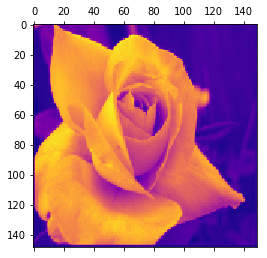

In [14]:
plt.matshow(activations[1][0, :, :, 1], cmap='plasma')
plt.show()

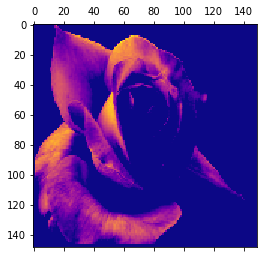

In [31]:
plt.matshow(activations[3][0, :, :, 1], cmap='plasma')
plt.show()

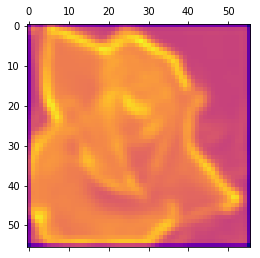

In [38]:
plt.matshow(activations[7][0, :, :, 1], cmap='plasma')
plt.show()

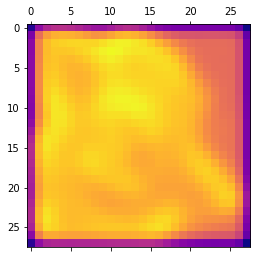

In [45]:
plt.matshow(activations[12][0, :, :, 5], cmap='plasma')
plt.show()

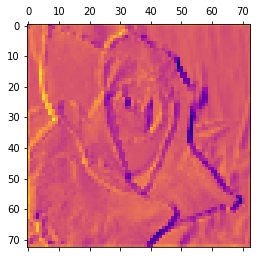

In [85]:
plt.matshow(activations[11][0, :, :, 20], cmap='plasma')
plt.show()

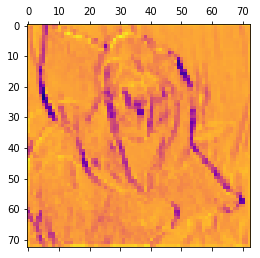

In [86]:
plt.matshow(activations[11][0, :, :, 40], cmap='plasma')
plt.show()

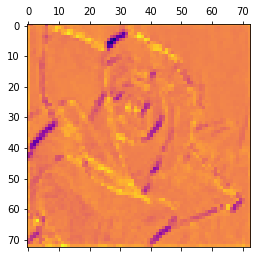

In [87]:
plt.matshow(activations[11][0, :, :, 79], cmap='plasma')
plt.show()

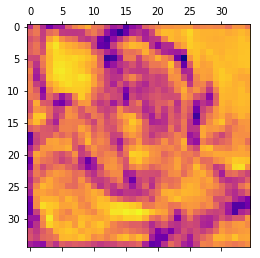

In [88]:
plt.matshow(activations[18][0, :, :, 1], cmap='plasma')
plt.show()

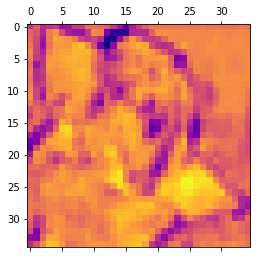

In [89]:
plt.matshow(activations[18][0, :, :, 20], cmap='plasma')
plt.show()

In [29]:
layer_names = ['conv2d_1', 'activation_1', 'conv2d_4', 'activation_4', 'conv2d_9', 'activation_9']
activ_list = [activations[1], activations[3], activations[11], activations[13], activations[18], activations[20]]

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activ_list):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='plasma')
    plt.savefig(layer_name+"_grid.jpg", bbox_inches='tight')

In [42]:
model = InceptionV3(weights='imagenet', include_top=False)

In [47]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, None, None, 3 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_189 (BatchN (None, None, None, 3 96          conv2d_189[0][0]                 
__________________________________________________________________________________________________
activation_189 (Activation)     (None, None, None, 3 0           batch_normalization_189[0][0]    
__________________________________________________________________________________________________
conv2d_190

In [43]:
def deprocess_image(x):
    
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [57]:
def generate_pattern(layer_name, filter_index, size=150):
    
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return deprocess_image(img)

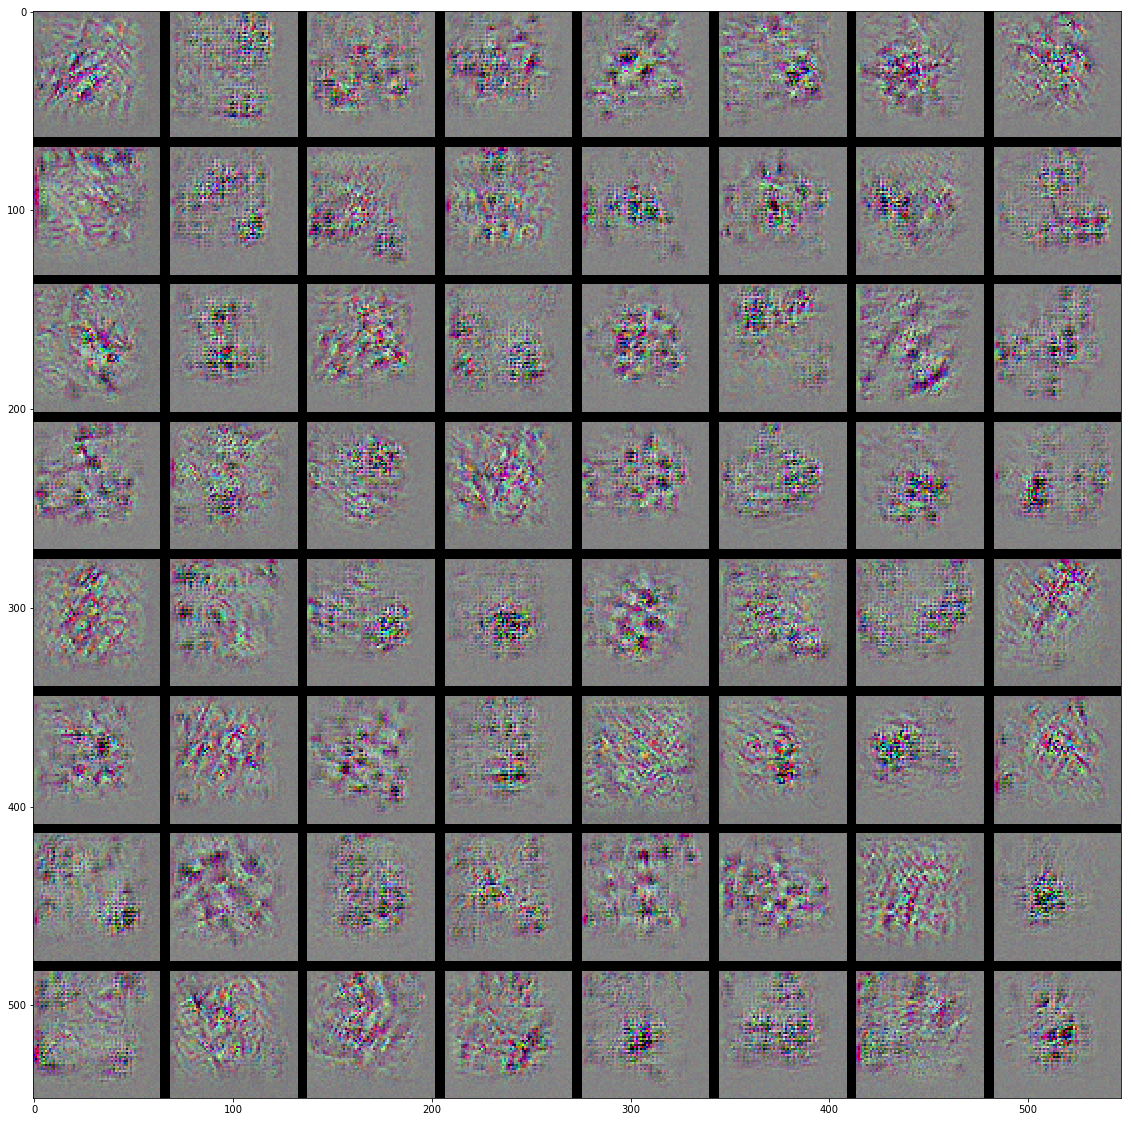

In [58]:
layer_name = 'conv2d_216'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
        
plt.figure(figsize=(20, 20))
plt.imshow(results)
plt.show()

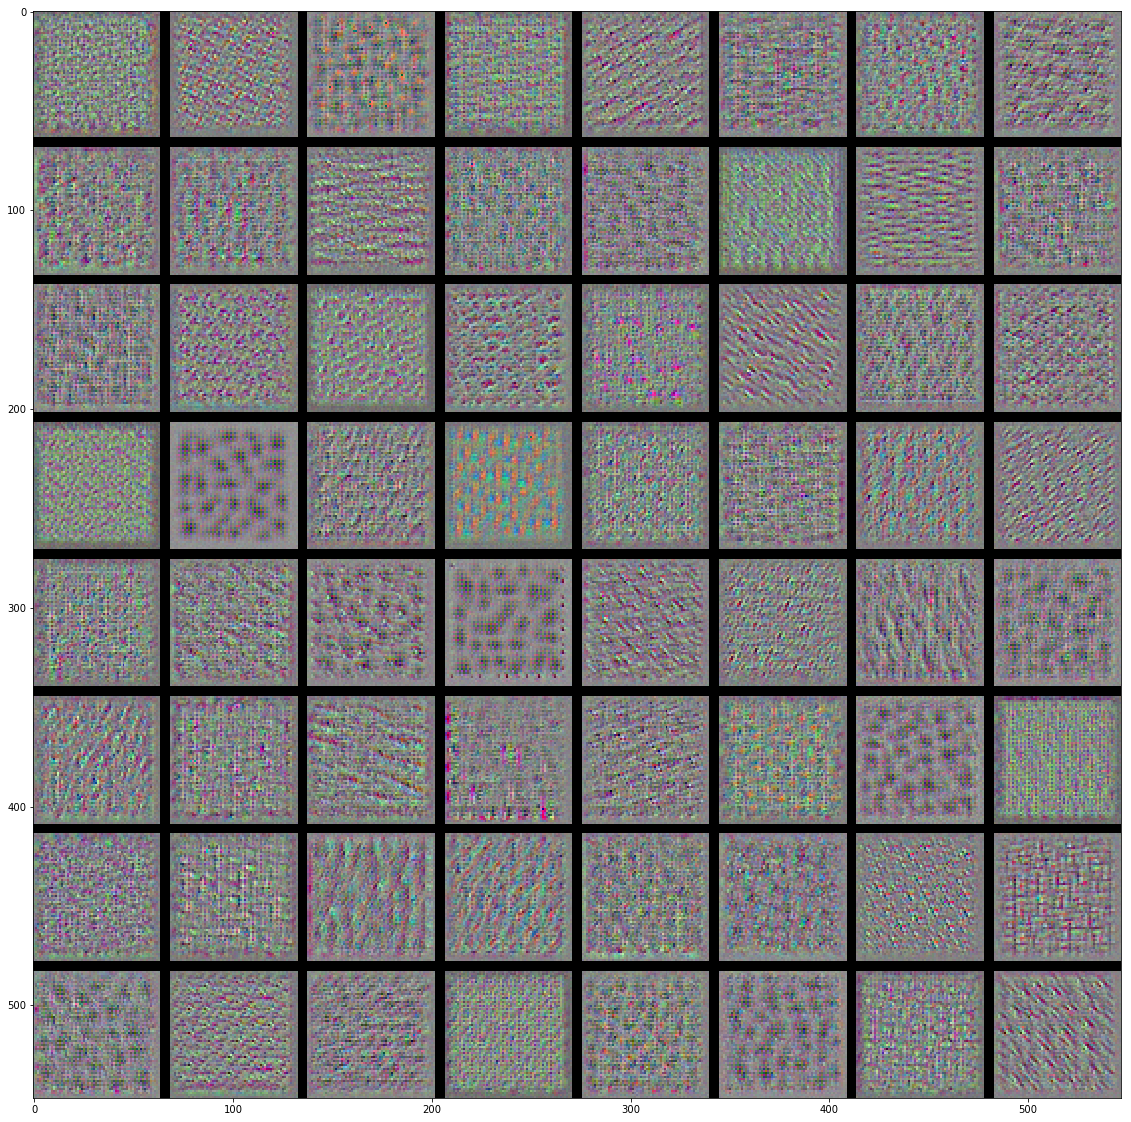

In [50]:
plt.show()

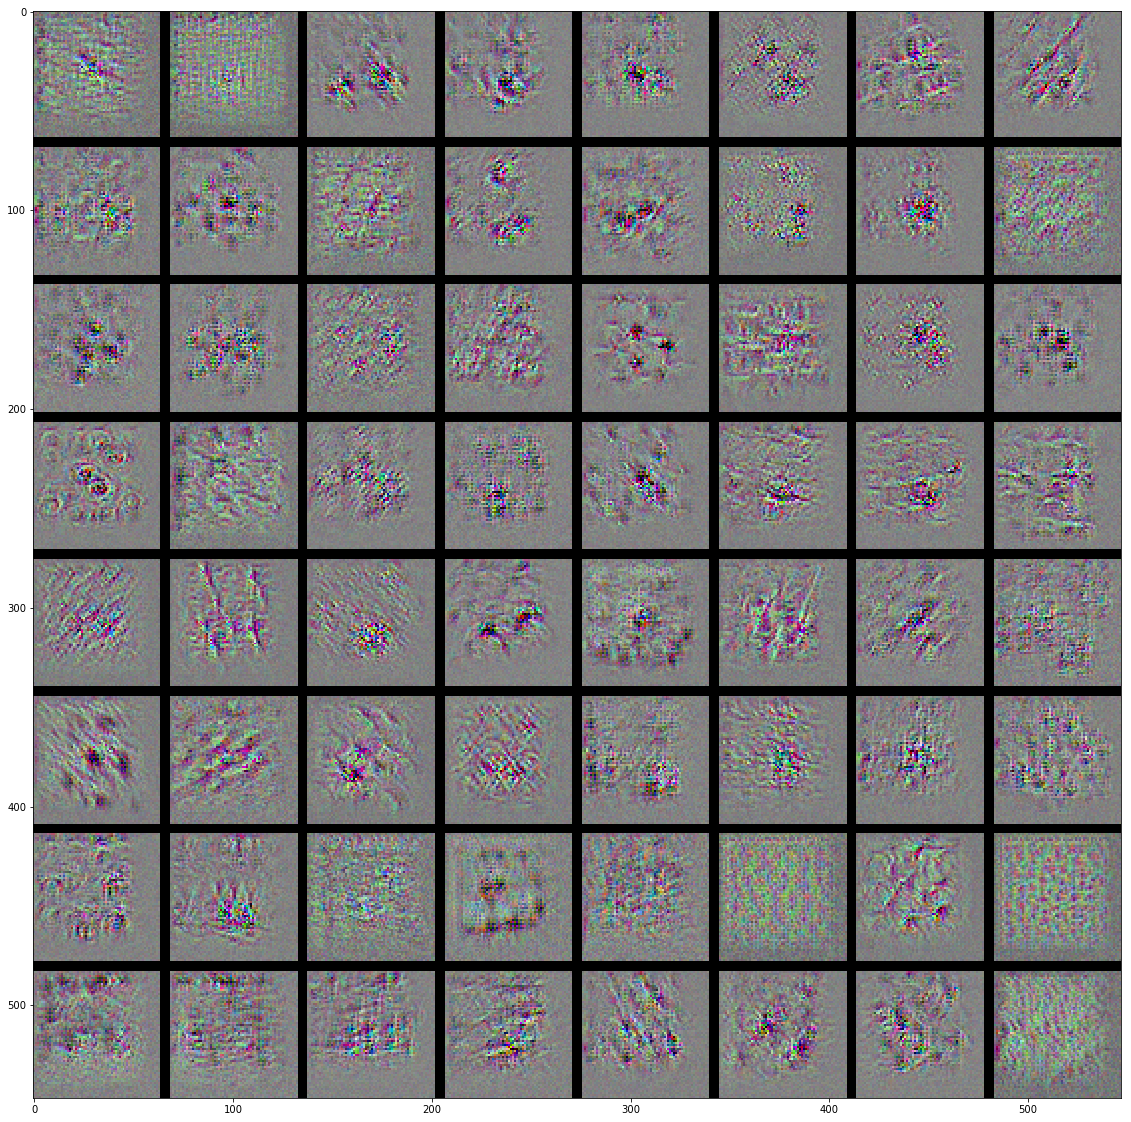

In [52]:
plt.show()

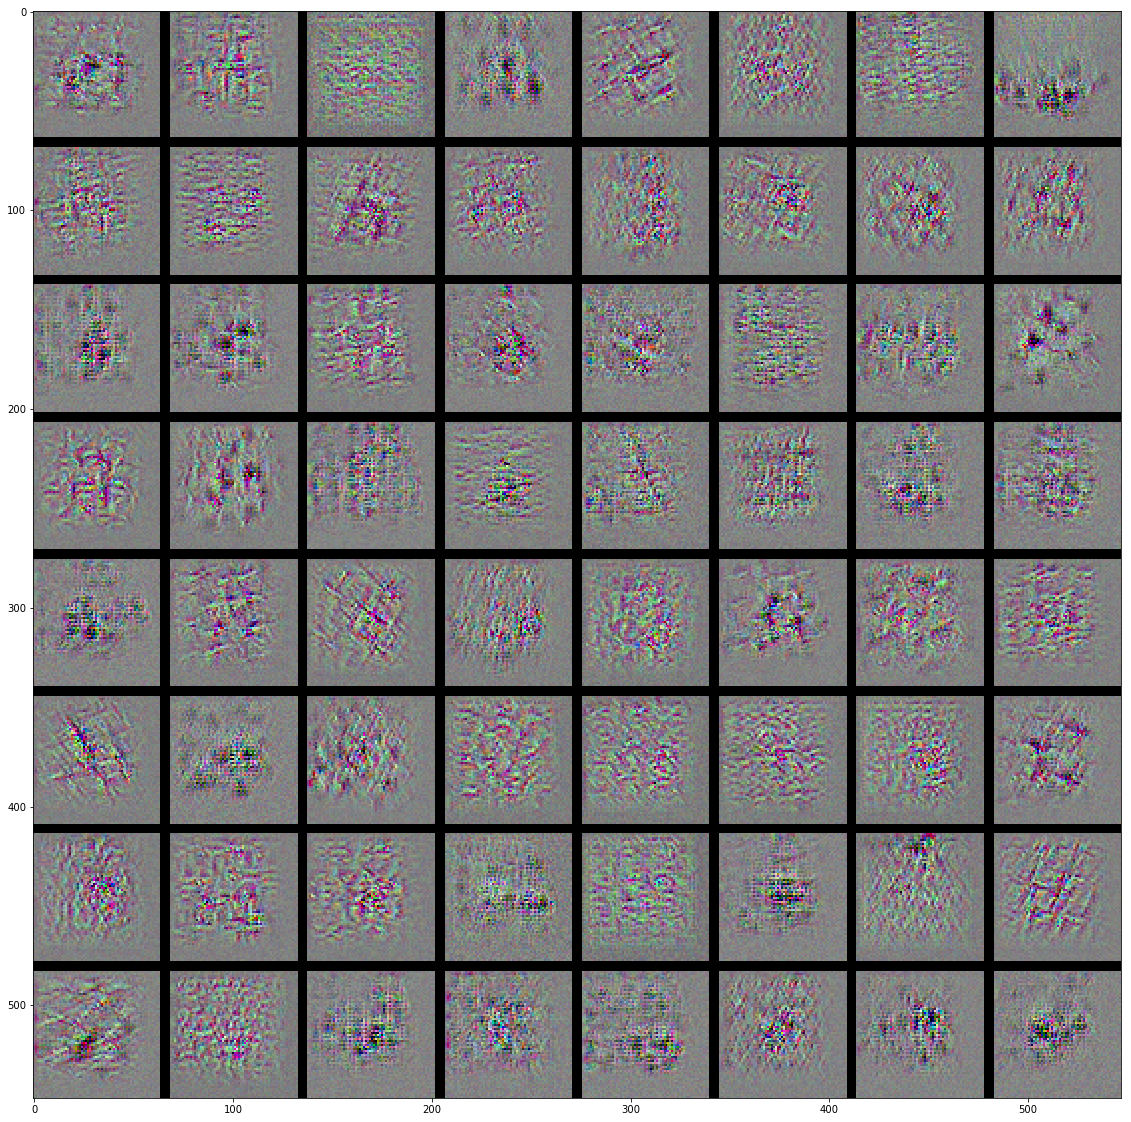

In [54]:
plt.show()

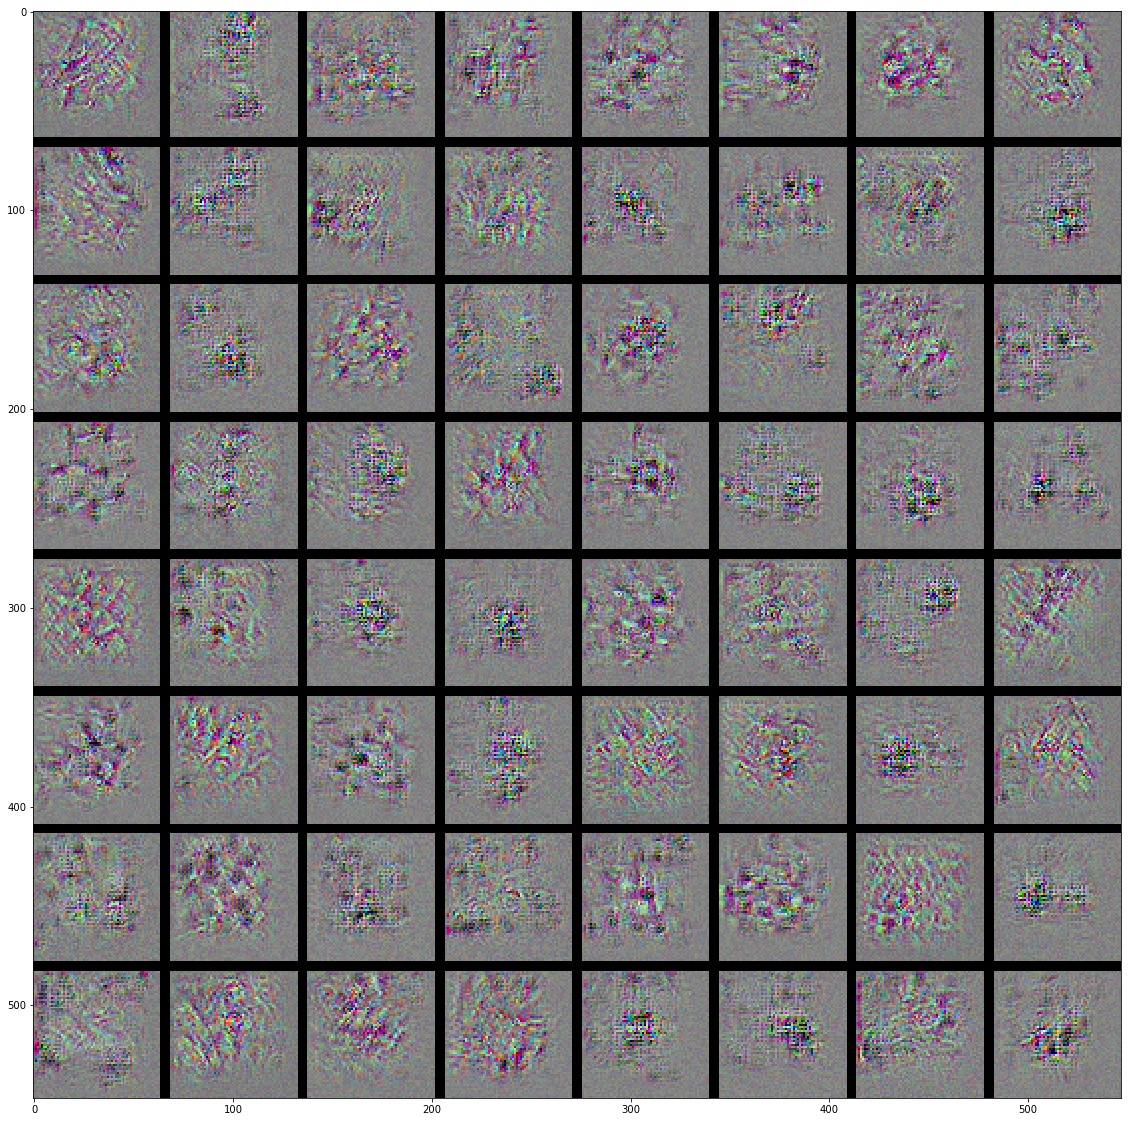

In [56]:
plt.show()